**Importing the Libraries**

In [1]:
import numpy as np
np.random.seed(42)

--------------------------------

**Nodes in each layer**

In [2]:
input_nodes = 1
hidden_1_nodes = 2
output_nodes = 3

-------------------------------------

**Inputs and true outputs**

In [3]:
X = np.array([0.02333333, 0.26333333, 0.86, 0.94666667, 0.30333333, 0.54, 0.42333333, 0.19, 0.17666667, 0.96666667]).reshape((-1,1)) #np.random.randint(1, 100, size = (input_nodes, 1)) / 100
X

array([[0.02333333],
       [0.26333333],
       [0.86      ],
       [0.94666667],
       [0.30333333],
       [0.54      ],
       [0.42333333],
       [0.19      ],
       [0.17666667],
       [0.96666667]])

In [4]:
ys = np.array([0, 0, 2, 2, 0, 1, 1, 0, 0, 2]).reshape((-1,1)) #np.array([[0],[1],[0]])
ys

array([[0],
       [0],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2]])

------------------

**Defining Activation functions and loss with their derivatives**

Sigmoid for first hidden layer

In [5]:
def sig(x):
    return 1/(1 + np.exp(-x))           

In [6]:
def sig_dash(x):
    return sig(x) * (1 - sig(x))

Softmax for second hidden layer and output layer

In [7]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))      

In [8]:
def softmax_dash(x):
    
    I = np.eye(x.shape[0])
    sm = softmax(x)
    smT = sm.T
    IsmT = I - smT
    
    return sm * IsmT

Categorical cross-entropy loss

In [9]:
def targets_to_onehot(N_classes, targets):
    one_hot = []
    for value in range(len(targets)):
        letter = [0 for _ in range(N_classes)]
        letter[targets[value]] = 1
        one_hot.append(letter)
    return one_hot

In [10]:
def cross_E(y_true, y_pred):
    targets_one_hot = targets_to_onehot(len(y_pred), y_true)
    eps = 1e-12
    preds = np.clip(y_pred, eps, 1-eps)
    N = preds.shape[0]
    # return -np.sum(targets_one_hot*np.log(preds))/N
    return -np.sum(targets_one_hot * np.log(y_pred + 10**-100))/N

In [11]:
def cross_E_grad(y_true, y_pred):
    return -y_true/(y_pred + 10**-100)

--------------------

**Random initialization of weights and biases**

In [12]:
w1 = np.array([[0.28401832],[-0.95381398]]) #np.random.random(size = (hidden_1_nodes, input_nodes))
b1 = np.array([-0.5243374610380842, 0.33221849539671044]) #np.zeros(shape = (hidden_1_nodes, 1))

print(w1,b1, sep='\n')

[[ 0.28401832]
 [-0.95381398]]
[-0.52433746  0.3322185 ]


In [13]:
w2 = np.array([[-0.15495577, -0.56723879], [ 0.63793899, -0.37206676], [-0.71792529, 0.49335413]]) #np.random.random(size = (output_nodes, hidden_1_nodes))
b2 = np.array([0.36843569825503186, 0.9072829906890265, 0.5228265849455143]) #np.zeros(shape = (output_nodes, 1))

print(w2,b2, sep='\n')

[[-0.15495577 -0.56723879]
 [ 0.63793899 -0.37206676]
 [-0.71792529  0.49335413]]
[0.3684357  0.90728299 0.52282658]


------------------

**Forward feed before training**

In [14]:
x = X[0, :]

in_hidden_1 = w1.dot(x) + b1
out_hidden_1 = sig(in_hidden_1)

in_output_layer = w2.dot(out_hidden_1) + b2
y_hat = softmax(in_output_layer)

y_hat

array([0.18786572, 0.4845507 , 0.32758358])

In [15]:
y = ys[0,:]
y

array([0])

In [16]:
cross_E(y, y_hat)

0.5573426040225352

-------------------------

**SGD Momentum**

In [17]:
learning_rate = 0.01
momentum = 0.9

In [18]:
update_w1 = np.zeros(w1.shape)

update_b1 = np.zeros(b1.shape)

update_w2 = np.zeros(w2.shape)

update_b2 = np.zeros(b2.shape)

print(update_w1, update_b1, sep='\n')
print(update_w2, update_b2, sep='\n')

[[0.]
 [0.]]
[0. 0.]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0.]


---------------------------------------------

**Total number of epochs**

In [19]:
epochs = 1000

------------------------

**Backpropagation in ANNs**

In [20]:
for epoch in range(epochs):
    for i in range(len(X)):
    #------------------------------------------Forward Propagation-------------------------------------------------
        x = X[i, :]
        y = ys[i,:]
        in_hidden_1 = w1.dot(x) + b1 #(2,1)
        out_hidden_1 = sig(in_hidden_1) #(2,1)

        in_output_layer = w2.dot(out_hidden_1) + b2 #(3,1)
        y_hat = softmax(in_output_layer) #(3,1) [0.18786572274388938, 0.4845507011829411, 0.3275835760731695]
        
        loss = cross_E(y, y_hat)
        print(f'loss before training is {loss} -- epoch number {epoch + 1}')
        print('\n')
        
    #-----------------------------------------Gradient Calculations via Back Propagation---------------------------

        sd = softmax_dash(in_output_layer) #(3,3) [[ 0.15257219, -0.23478938, -0.107311  ],[-0.03529353,  0.24976132, -0.107311  ],[-0.03529353, -0.23478938,  0.22027258]]
        ced = cross_E_grad(y, y_hat) #(3,1)
        summ = np.sum(ced * sd, axis = 0) #(3,)
        resh = summ.reshape((-1, 1)) #(3,1)
        error_upto_softmax = resh
        
        grad_w2 = error_upto_softmax .dot( out_hidden_1.T ) #(3,2)
        
        grad_b2 = error_upto_softmax #(3,1)
        
        #-----------------------------------------c
        
        error_grad_upto_H1 = np.sum(error_upto_softmax * w2, axis = 0) .reshape((-1, 1)) #(2,1)
        
        grad_w1 = error_grad_upto_H1 * sig_dash(in_hidden_1) .dot( x.T ) #(2,1)
        
        grad_b1 = error_grad_upto_H1 * sig_dash(in_hidden_1) #(2,1)
        
    #-----------------------------------------Updating weights and biases via SGD Momentum------------------------

        update_w1 = - learning_rate * grad_w1 + momentum * update_w1
        w1 += update_w1 #(2,1)
        
        update_b1 = - learning_rate * grad_b1 + momentum * update_b1
        b1 += update_b1 #(2,1)
        
        update_w2 = - learning_rate * grad_w2 + momentum * update_w2
        w2 += update_w2 #(3,2)
        
        update_b2 = - learning_rate * grad_b2 + momentum * update_b2
        b2 += update_b2 #(3,1)

loss before training is 0.5573426040225352 -- epoch number 1




ValueError: shapes (3,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

-------------------------

**Forward feed after training**

In [ ]:
in_hidden_1 = w1.dot(x) + b1
out_hidden_1 = sig(in_hidden_1)

in_output_layer = w2.dot(in_hidden_1) + b2
y_hat = softmax(in_output_layer)

y_hat

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [ ]:
y

array([[0],
       [1],
       [0]])

In [ ]:
cross_E(y, y_hat)

0.001991270523606741

In [ ]:
import numpy as np

class NeuralNetwork:
    
    def __init__(self):
        self.input_layer_size = 1
        self.hidden_layer_size = 2
        self.output_layer_size = 3
        self.W1 = np.array([[0.28401832, -0.95381398]]) #np.random.randn(self.input_layer_size, self.hidden_layer_size) #[[-0.946956],[-0.05371076]] here [[2.268696555647382, 1.0747582434460212]]
        self.b1 = np.array([[-0.52433746, 0.33221849]]) #np.zeros((1, self.hidden_layer_size)) #[-0.04069894424931042, -0.8648014344296282] here [[0., 0.]]
        self.W2 = np.array([[-0.15495577, 0.63793899, -0.71792529],[-0.56723879, -0.37206676, 0.49335413]]) #np.random.randn(self.hidden_layer_size, self.output_layer_size) #[[-0.01435154,  0.48572941],[0.17128856, 0.85747956],[ 0.08848815, -0.77120695]] here [[ 0.78696879, -0.5470661 ,  1.32080322],[-0.49238067, -0.46736653, -0.30174847]]
        self.b2 = np.array([[0.36843569, 0.90728299, 0.52282658]]) #np.zeros((1, self.output_layer_size)) #[0.5863426622842711, 0.4967395061795983, 0.20838814081519974] here [[0., 0., 0.]]
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true])
        loss = np.sum(log_likelihood) / m
        return loss
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax_derivative(self, x):
        return x * (1 - x)
    
    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            for j in range(X.shape[0]):
                # Forward propagation
                x = X[j] # [0.02333333]
                z1 = np.dot(x, self.W1) + self.b1 #[[-0.51771037,  0.30996283]]
                a1 = self.sigmoid(z1) #[[0.37338778, 0.57687619]]
                z2 = np.dot(a1, self.W2) + self.b2 #[[-0.01664945,  0.93084516,  0.5393663 ]]
                a2 = self.softmax(z2) #[[0.18786572, 0.4845507 , 0.32758358]]

                # Backpropagation
                delta2 = a2
                delta2[0, y[j]] -= 1 #[[-0.81213428,  0.4845507 ,  0.32758358]]
                sigd = self.sigmoid_derivative(a1) #[[0.23396935, 0.24409005]]
                dot = np.dot(delta2, self.W2.T) #[[0.19977815, 0.44200356]]
                delta1 = sigd * dot #[[0.04674196, 0.10788867]]

                # Update weights
                self.W2 -= learning_rate * np.outer(a1, delta2) # here [[-0.12463167,  0.61984646, -0.73015686],[-0.5203887 , -0.40001934,  0.47445661]]
                self.b2 -= learning_rate * delta2 # here [[0.44964912, 0.85882792, 0.49006822]]
                self.W1 -= learning_rate * np.outer(x, delta1) # here [[ 0.28390926, -0.95406572]]
                self.b1 -= learning_rate * delta1 # here [[-0.52901166,  0.32142962]]
        
    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.softmax(z2)
        return np.argmax(a2, axis=1)

# new_data_x = np.random.randint(1, 300, 200)
# new_data_target = new_data_x // 100
# print(new_data_target)
# new_data_x = new_data_x / 300   
# print(new_data_x)

new_data_x = [0.02333333, 0.26333333, 0.86, 0.94666667, 0.30333333, 0.54, 0.42333333, 0.19, 0.17666667, 0.96666667]
new_data_target = [0, 0, 2, 2, 0, 1, 1, 0, 0, 2]
print(new_data_target)
print(new_data_x)

X_train = np.array(new_data_x).reshape(-1, 1)
y_train = np.array(new_data_target)

nn = NeuralNetwork()
nn.train(X_train, y_train, epochs=500, learning_rate=0.1)
X_test = np.array([0.0, 0.0, 0.000001, 0.5, 0.4, 0.8, 0.9]).reshape(-1, 1)
y_pred = nn.predict(X_test)
print("Predicted class labels:", y_pred)

[0, 0, 2, 2, 0, 1, 1, 0, 0, 2]
[0.02333333, 0.26333333, 0.86, 0.94666667, 0.30333333, 0.54, 0.42333333, 0.19, 0.17666667, 0.96666667]
Predicted class labels: [0 0 0 1 1 2 2]


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def softmax_derivative(self, x):
        s = x.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)
        
    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        # Output layer error
        self.output_error = output - y
        d_z2 = self.output_error * self.softmax_derivative(self.a2)
        
        # Hidden layer error
        d_a1 = np.dot(d_z2, self.W2.T)
        d_z1 = d_a1 * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * np.dot(self.a1.T, d_z2)
        self.b2 -= self.learning_rate * np.sum(d_z2, axis=0, keepdims=True)
        self.W1 -= self.learning_rate * np.dot(X.T, d_z1)
        self.b1 -= self.learning_rate * np.sum(d_z1, axis=0)
        
    def train(self, X, y, epochs):
        for i in range(epochs):
            for j in range(X.shape[0]):
                output = self.forward(X[j])
                self.backward(X[j], y[j], output)
                
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

In [ ]:
X_train = np.array([0.88333333, 0.58, 0.91333333, 0.4, 0.74, 0.96, 0.51666667, 0.3, 0.69333333, 0.63666667])
y_train = np.array([2, 1, 2, 1, 2, 2, 1, 0, 2, 1])

nn = NeuralNetwork(1,2,3,0.1)
nn.train(X_train.reshape(-1, 1), y_train.reshape(-1, 1), epochs=1000)
X_test = np.array([0.0, 0.0, 0.000001, 0.5, 0.4, 0.8, 0.9]).reshape(-1, 1)
y_pred = nn.predict(X_test)
print("Predicted class labels:", y_pred)

ValueError: shapes (2,1) and (3,3) not aligned: 1 (dim 1) != 3 (dim 0)

In [ ]:
import numpy as np

class MultiClassNN:
    def __init__(self):
        self.input_size = 1
        self.hidden_size = 2
        self.output_size = 3
        self.learning_rate = 0.1
        self.epochs = 1500

        self.W1 = np.array([[0.28401832, -0.95381398]]) #np.random.randn(self.input_layer_size, self.hidden_layer_size) #[[-0.946956],[-0.05371076]] here [[2.268696555647382, 1.0747582434460212]]
        self.b1 = np.array([[-0.52433746, 0.33221849]]) #np.zeros((1, self.hidden_layer_size)) #[-0.04069894424931042, -0.8648014344296282] here [[0., 0.]]
        self.W2 = np.array([[-0.15495577, 0.63793899, -0.71792529],[-0.56723879, -0.37206676, 0.49335413]]) #np.random.randn(self.hidden_layer_size, self.output_layer_size) #[[-0.01435154,  0.48572941],[0.17128856, 0.85747956],[ 0.08848815, -0.77120695]] here [[ 0.78696879, -0.5470661 ,  1.32080322],[-0.49238067, -0.46736653, -0.30174847]]
        self.b2 = np.array([[0.36843569, 0.90728299, 0.52282658]]) #np.zeros((1, self.output_layer_size)) #[0.5863426622842711, 0.4967395061795983, 0.20838814081519974] here [[0., 0., 0.]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def cross_entropy_loss(self, y, y_hat):
        return -np.sum(y * np.log(y_hat))
        
    def apply(self, x):
        h_array = self.forward(x)
        return h_array[-1]

    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, x, y, y_hat):
        delta3 = y_hat - y
        dW2 = np.dot(self.a1.T, delta3)
        db2 = np.sum(delta3, axis=0)
        delta2 = delta3.dot(self.W2.T) * self.a1 * (1 - self.a1)
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y):
        costs = []
        m = X.shape[0]

        for epoch in range(self.epochs):
            avg_cost = 0

            for i in range(m):
                x = X[i]
                x = x.reshape(1, -1)
                y_i = y[i]
                y_i = y_i.reshape(1, -1)

                y_hat = self.forward(x)
                cost = self.cross_entropy_loss(y_i, y_hat)
                self.backward(x, y_i, y_hat)

                avg_cost += cost / m

            costs.append(avg_cost)

        return costs

d:\ProgrammFiles\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_13864\4125930933.py:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(y_hat))
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_13864\4125930933.py:20: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_13864\4125930933.py:20: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)


<AxesSubplot:>

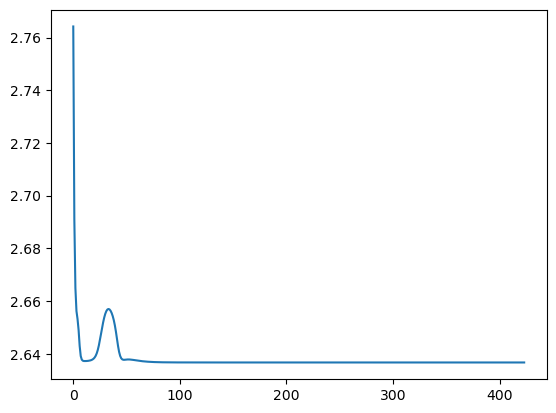

In [ ]:
import seaborn as sns

new_data_x = np.array([0.02333333, 0.26333333, 0.86, 0.94666667, 0.30333333, 0.54, 0.42333333, 0.19, 0.17666667, 0.96666667])
new_data_target = np.array([0, 0, 2, 2, 0, 1, 1, 0, 0, 2])

N = MultiClassNN()
avg_cost_func = N.train(X=new_data_x.reshape(-1, 1), y=new_data_target.reshape(-1, 1))
sns.lineplot(data=avg_cost_func)

In [ ]:
predictions = [N.apply([0.2]), N.apply([0.6]),N.apply([0.9])]
print(predictions)

[array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan])]
